In [ ]:
python -m spacy download en_core_web_sm

In [71]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import pandas as pd
import numpy as np
from scipy.stats import randint
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()


df = pd.read_csv('stock_data.csv')
df['Text'] = df['Text'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])
df['Sentiment'] = df['Sentiment'].astype(np.int64)
print(df.info())

test_data = pd.read_csv('./raw_news/NewsData-2023-05-05.csv')
test_data['Date'] = pd.to_datetime(test_data['Date'])
# test_data= test_data.iloc[:,:-1]
test_data.rename(columns = {'Headline':'Text'}, inplace = True)
test_data['Text'] = test_data['Text'].astype(str)
# test_data =test_data.replace(r'^\s*$', np.nan, regex=True)
# test_data = test_data[['Text','Date']].merge(df, on=['Text','Date'], how='left')
# test_data = test_data[test_data['Text'].str.contains("\?")==False]
print(test_data.info())
print(df['Sentiment'].value_counts())

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

to_remove = ['up', 'down','low','high','below','less','fall','Daily Voice']
new_stopwords = set(stopwords.words('english')).difference(to_remove)
stemmer = SnowballStemmer(language='english')
def text_data_cleaning(sentence):
    sent = preprocess_text(sentence)
    doc = nltk.word_tokenize(sent)
    lemma =[lemmatizer.lemmatize(word, pos ="v") for word in doc]
    return append_message(lemma)
def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    sentence = sen.lower()
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub('rs|cr|crore|point|points|pt|stock', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence) 
    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  
    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(new_stopwords) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

def append_message(text):
  str = " "
  return (str.join(text))

df['Tok_text'] = df['Text'].apply(text_data_cleaning)
df['Tok_text'] = df['Tok_text'].astype(str)
tf_idf_vect = TfidfVectorizer()

df2 = df.iloc[:,2:]

df_train, df_test = train_test_split(df2, test_size=0.3, random_state=42,
                                     stratify=df2['Sentiment'])
print(df2.info())
X_train = tf_idf_vect.fit_transform(df_train['Tok_text'])
y_train = df_train['Sentiment']
X_test = tf_idf_vect.transform(df_test['Tok_text'])
y_test = df_test['Sentiment']

test_data['Tok_text'] = test_data['Text'].apply(text_data_cleaning)
x_test = tf_idf_vect.transform(test_data['Tok_text'])
print(x_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52650 entries, 0 to 52649
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       52650 non-null  object        
 1   Date       52650 non-null  datetime64[ns]
 2   Sentiment  52650 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  154 non-null    int64         
 1   Text        154 non-null    object        
 2   Date        154 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.7+ KB
None
Sentiment
1    26898
0    14651
2    11101
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52650 entries, 0 to 52649
Data columns (total 

In [15]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [ ]:
a = [1,2,3]


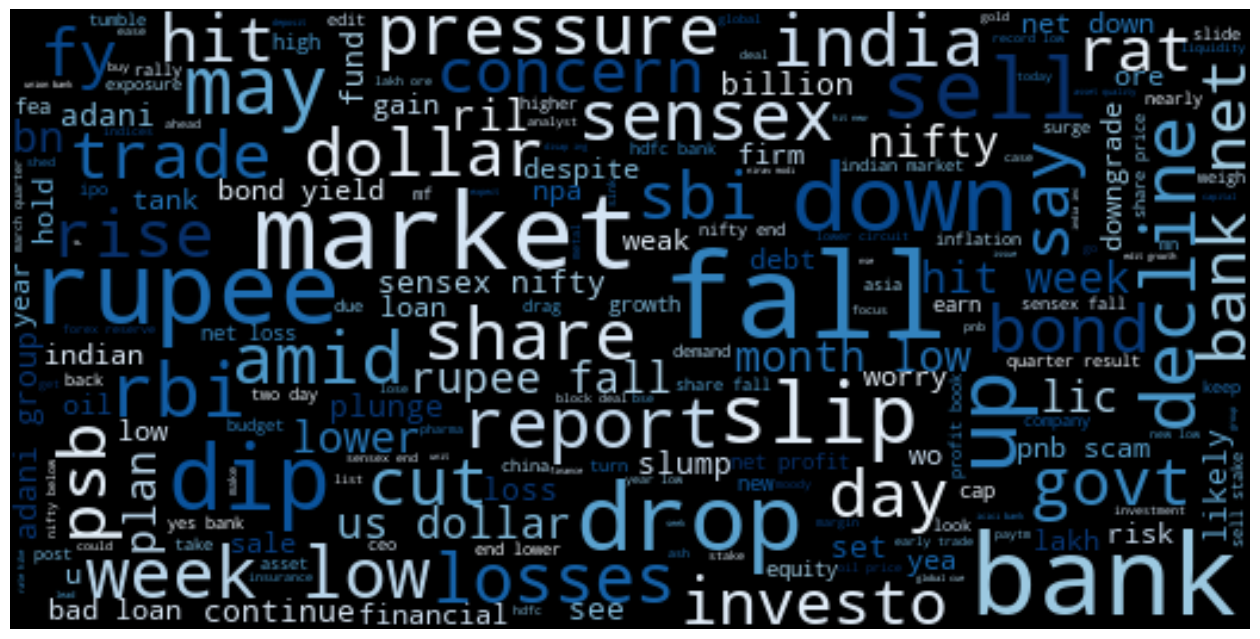

<Figure size 640x480 with 0 Axes>

In [4]:
pos_msg = df[df['Sentiment'] == 1]
zeo_msg = df[df['Sentiment']==0]
nrg_msg = df[df['Sentiment']==2]
pos_msg_text = " ".join(pos_msg.Tok_text.to_numpy().tolist())
zeo_msg_text = " ".join(zeo_msg.Tok_text.to_numpy().tolist())
nrg_msg_text = " ".join(nrg_msg.Tok_text.to_numpy().tolist())

pos_msg_cloud = WordCloud(width =520, height =260, stopwords=new_stopwords,max_font_size=50, background_color ="black", colormap='Blues').generate(pos_msg_text)
# plt.figure(figsize=(16,10))
# plt.imshow(pos_msg_cloud, interpolation='bilinear')
# plt.axis('off') # turn off axis
# plt.show()
# plt.savefig('wordcloud.png', bbox_inches='tight')
# zeo_msg_cloud = WordCloud(width =520, height =260, stopwords=new_stopwords,max_font_size=50, background_color ="black", colormap='Blues').generate(zeo_msg_text)
# plt.figure(figsize=(16,10))
# plt.imshow(zeo_msg_cloud, interpolation='bilinear')
# plt.axis('off') # turn off axis
# plt.show()
# plt.savefig('wordcloud2.png', bbox_inches='tight')
nrg_msg_cloud = WordCloud(width =520, height =260, stopwords=new_stopwords,max_font_size=50, background_color ="black", colormap='Blues').generate(nrg_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(nrg_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()
plt.savefig('negative.png', bbox_inches='tight')


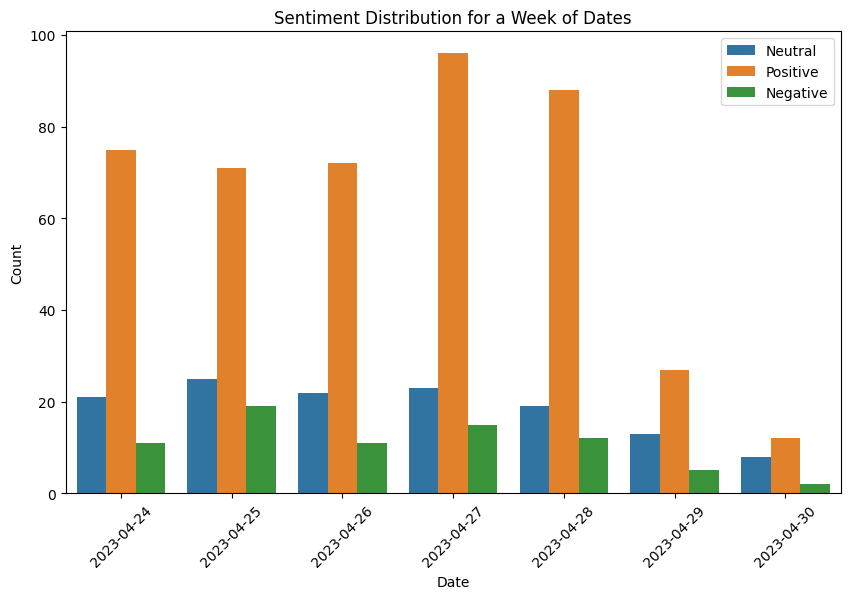

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Set the figure size
plt.figure(figsize=(10, 6))
today = datetime.date.today()

# Filter the data for a week of dates
start_date = today - datetime.timedelta(days=today.weekday() + 7)
end_date = today - datetime.timedelta(days=today.weekday() + 1)
week_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

sns.countplot(data=week_data, x="Date", hue="Sentiment")

# Plot the bar plot with hue
# ax = week_data['Date'].value_counts().sort_index().plot(kind='bar', color='skyblue', alpha=0.7, hue=week_data['Sentiment'])

# Set the x-axis labels to be rotated for better visibility
plt.xticks(rotation=45)

# Set the x and y-axis labels
plt.xlabel('Date')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Sentiment Distribution for a Week')

# Show the legend
plt.legend(('Neutral','Positive', 'Negative'))

# Display the plot
plt.show()

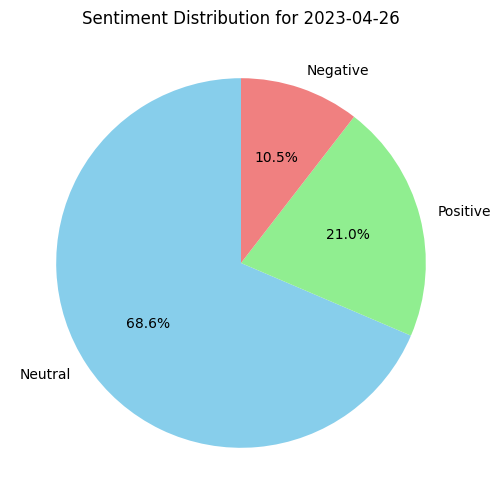

In [31]:
import matplotlib.pyplot as plt
import datetime

# Set the figure size
plt.figure(figsize=(6, 6))

# Choose a specific date
selected_date = today - datetime.timedelta(days=today.weekday() + 5)

# Filter the data for the selected date
date_data = df[df['Date'] == selected_date]

# Count the sentiment categories
sentiment_counts = date_data['Sentiment'].value_counts()

# Get the sentiment labels and counts
sentiment_labels = sentiment_counts.index
sentiment_values = sentiment_counts.values

# Set the colors for each sentiment category
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Create the pie chart
plt.pie(sentiment_values, labels=['Neutral','Positive', 'Negative'], colors=colors, autopct='%1.1f%%', startangle=90)

# Set the title of the plot
plt.title('Sentiment Distribution for ' + str(selected_date))
# plt.legend(('Neutral','Positive', 'Negative'))

# Display the plot
plt.show()


In [20]:
from datetime import datetime

def format_date(timestamp):
    dt = datetime.strptime(str(timestamp), '%Y-%m-%d %H:%M:%S')
    formatted_date = dt.strftime('%Y-%m-%d')
    return formatted_date

df['Date']=df['Date'].apply(format_date)

# Print the formatted date
# print(formatted_date)

In [22]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [9]:
df['Date'].max()

Timestamp('2023-05-01 00:26:00')

In [1]:
# df['Date'] = pd.to_datetime(df['Date']) - pd.to_timedelta(7, unit='d')
# df1 = df.groupby(['Text', pd.Grouper(key='Date', freq='W-MON')])['Quantity'].sum().reset_index().sort_values('Date')
# print (df)

In [72]:
clf1 = SGDClassifier(alpha=0.0001,loss='modified_huber')
clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
score = accuracy_score(y_pred,y_test)
print(score,"SDG")

clf2 = LogisticRegression(C=10,multi_class='multinomial',penalty='l2',solver='lbfgs')
clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)
print(classification_report(y_test,y_pred2))
score1 = accuracy_score(y_pred2,y_test)
print(score, "LR")

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4395
           1       0.90      0.93      0.91      8070
           2       0.89      0.83      0.86      3330

    accuracy                           0.89     15795
   macro avg       0.89      0.88      0.88     15795
weighted avg       0.89      0.89      0.89     15795

0.8905982905982905 SDG
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4395
           1       0.91      0.92      0.91      8070
           2       0.88      0.84      0.86      3330

    accuracy                           0.89     15795
   macro avg       0.88      0.88      0.88     15795
weighted avg       0.89      0.89      0.89     15795

0.8905982905982905 LR


c:\Users\kings\OneDrive\Documents\Stock-Analysis\envr\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# a = [ 'NewsData-2023-05-01.csv',
# 'NewsData-2023-05-02.csv',
# 'NewsData-2023-05-03.csv',
# 'NewsData-2023-05-04.csv',
# 'NewsData-2023-05-05.csv','bs.csv']
# import os 

# for file in os.listdir('./raw_news'):
#     if file not in a:
#         os.remove("./raw_news/"+file)
#         print(file)

In [48]:
import pickle
pickle.dump(clf2, open('model1.pkl', 'wb'))
# pickle.dump(tf_idf_vect, open("vectorizer.pkl", "wb"))


In [111]:
test_data.head()

,Unnamed: 0,Text,Tok_text
0,0,"Banks, realty, auto stocks surge on RBI’s booster package",bank realty auto surge rbi booster package
1,1,Sebi increases scrutiny of FPIs from 11 Asian countries,sebi ease utiny fpis asian countries
2,2,"Market seen on edge ahead of RBI governor's address; RIL, TCS in focus",market see edge ahead rbi governor address ril tcs focus
3,3,"Stocks to Watch: TCS, IndiGo, Reliance Industries, SpiceJet, Motherson Sumi",watch tcs indigo reliance industries spicejet mothe sumi
4,4,Asian stocks climb as US paves way to reopen economy,asian climb us pave way reopen economy


In [73]:
y_pred = clf1.predict(x_test)
check = pd.DataFrame({'Text':test_data['Text'],'Date':test_data['Date'],'Sentiment':y_pred})
# check = pd.DataFrame({'Text':all_df['Text'],'Date':all_df['Date'],'Sentiment':y_pred})
check.to_csv('check.csv',index=False)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47066 entries, 0 to 47065
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       47066 non-null  object        
 1   Date       47066 non-null  datetime64[ns]
 2   Sentiment  47066 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ MB


In [69]:
df.drop(columns=['Unnamed: 0','Tok_text'], axis=1,  inplace=True)

In [74]:
df1 = pd.read_csv('check.csv')
print(df1.info())
print(df.info())
fg = pd.concat([df,df1],ignore_index=True)
# fg.info()
fg.to_csv('stock_data.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       154 non-null    object
 1   Date       154 non-null    object
 2   Sentiment  154 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52650 entries, 0 to 52649
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       52650 non-null  object        
 1   Date       52650 non-null  datetime64[ns]
 2   Sentiment  52650 non-null  int64         
 3   Tok_text   52650 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.6+ MB
None


In [51]:
import pandas as pd
import numpy as np
df33 = pd.read_csv('check.csv')
df33['Text'] = df33['Text'].astype(str)
df33.drop_duplicates(subset="Text",
                     keep=False, inplace=True)
df33['Date'] = pd.to_datetime(df33['Date'])
df33['Sentiment'] = df33['Sentiment'].astype(np.int64)
print(df33.info())


<class 'pandas.core.frame.DataFrame'>
Index: 5605 entries, 0 to 6198
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       5605 non-null   object        
 1   Date       5605 non-null   datetime64[ns]
 2   Sentiment  5605 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 175.2+ KB
None


c:\Users\kings\OneDrive\Documents\Stock-Analysis\envr\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\kings\AppData\Local\Temp\ipykernel_16884\2133166450.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df33['Date'] = pd.to_datetime(df33['Date'])


In [70]:
df33['Sentiment'].value_counts()

Sentiment
1    3121
0    1148
2     758
Name: count, dtype: int64

In [69]:
# df = df[df['Text'].str.contains('Wall St')==False]
df33.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5027 entries, 0 to 6198
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       5027 non-null   object        
 1   Date       5027 non-null   datetime64[ns]
 2   Sentiment  5027 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 157.1+ KB


In [46]:
a = [3,2,3]
print(max(a,key=a.count))

3


In [95]:
df33.to_csv('check.csv',index=False)

In [68]:
df33 = df33[df33['Text'].str.contains('\?')!=True]

In [31]:
df33.loc[df33['Text'].str.contains('\?')&(df33['Sentiment']==1), 'Sentiment']= 0

In [ ]:
df33[df33['Text'].str.contains(' scam ')& (df33['Sentiment']==1)

In [94]:
#df.iloc[301, df.columns.get_loc('Sentiment')] = 1
df33.at[1029, 'Sentiment'] = 2

In [33]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [92]:
df33[df33['Text'].str.contains(' risk')&  (df33['Sentiment']==1)][['Text','Sentiment']]

,Text,Sentiment
532,Sensex rises for 2nd straight day on improved risk sentiment; investors gain Rs 2.12L cr,1
578,Global mkts fully pricing in Fed hike to 5.5%; Indian equities at risk: UBS,1
1029,"20% of Titan's fair value at risk, says ICICI Securities: Here's why",1
1299,"Jefferies explains SVB Financial Group's India connection, potential risks",1
2076,Brokerage firm Nirmal Bang sees favourable risk-reward in pharma,1
2148,SVB fallout: Zerodha CEO on investing in govt bonds without taking risks,1
2340,Why markets are in uproar over a risky bank bond known as AT1,1
2451,Systemic credit event in US shadow banks the biggest tail risk for markets,1
2592,"TVS Motors turned ""electrification risk into an opportunity"", 47% upside expected: Jefferies",1
2599,Economic fallout of banking crisis a bigger risk for IT sector,1
